In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib.patches import Rectangle

In [2]:
def mostrarImagen(inp1):
    plt.imshow(inp1)
    plt.axis("Off")

In [3]:
def mostrarHeatMap(mat, row_labels=None, col_labels=None, fmt=".2f", title=None):
    """
    Dibuja un heatmap con anotaciones por celda (mat[i,j]).
    - mat: array 2D (numpy) con valores (puede contener NaN).
    - row_labels / col_labels: listas opcionales de etiquetas.
    - fmt: formato de número (e.g., '.2f', '.0f').
    - title: título opcional.
    """
    mat = np.asarray(mat, dtype=float)
    fig, ax = plt.subplots(figsize=(12, 10))

    im = ax.imshow(mat, aspect="auto", interpolation="nearest")
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Valor")

    nrows, ncols = mat.shape

    # Etiquetas si se proveen
    if row_labels is not None:
        ax.set_yticks(range(nrows), labels=row_labels)
    else:
        ax.set_yticks(range(nrows))
    if col_labels is not None:
        ax.set_xticks(range(ncols), labels=col_labels)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    else:
        ax.set_xticks(range(ncols))

    # Anotar cada celda
    for i in range(nrows):
        for j in range(ncols):
            val = mat[i, j]
            if np.isnan(val):
                text = ""  # no anotar NaN
            else:
                text = format(val, fmt)
            ax.text(j, i, text, ha="center", va="center", fontsize=8)

    if title:
        ax.set_title(title)

    ax.set_xlabel("Columnas")
    ax.set_ylabel("Filas")
    plt.tight_layout()
    plt.show()

In [4]:
def _square_bounds_from_center(r, c, size, nrows, ncols):
    """
    Devuelve (r0, r1, c0, c1) para un cuadrado centrado en (r,c) de lado `size`.
    r1 y c1 son exclusivos (estilo slicing de Python).
    Lanza ValueError si se sale de límites.
    """
    if size <= 0:
        raise ValueError("size debe ser entero positivo.")
    if not (0 <= r < nrows and 0 <= c < ncols):
        raise ValueError("Centro fuera de rango.")
    # Para tamaños pares y nones:
    half_floor = size // 2
    r0 = r - half_floor
    c0 = c - half_floor
    r1 = r0 + size
    c1 = c0 + size
    if r0 < 0 or c0 < 0 or r1 > nrows or c1 > ncols:
        raise ValueError("El cuadrado centrado excede los límites de la matriz.")
    return r0, r1, c0, c1

def heatmap_resaltado_centro(mat, r, c, size, cmap_base="viridis", cmap_resalte="plasma"):
    """
    Heatmap que recolorea una subregión cuadrada centrada en (r,c) con otro colormap.
    """
    mat = np.asarray(mat, dtype=float)
    nrows, ncols = mat.shape
    r0, r1, c0, c1 = _square_bounds_from_center(r, c, size, nrows, ncols)

    fig, ax = plt.subplots(figsize=(12, 10))
    im_base = ax.imshow(mat, cmap=cmap_base, aspect="auto", interpolation="nearest")
    cbar = plt.colorbar(im_base, ax=ax); cbar.set_label("Valor")

    # Máscara: True = oculto, False = visible. Solo mostramos la región resaltada con otro cmap.
    mask = np.ones_like(mat, dtype=bool)
    mask[r0:r1, c0:c1] = False
    region = np.ma.masked_array(mat, mask=mask)
    ax.imshow(region, cmap=cmap_resalte, aspect="auto", interpolation="nearest",
              norm=im_base.norm)

    # Marco del cuadrado
    ax.add_patch(Rectangle((c0-0.5, r0-0.5), width=size, height=size,
                           fill=False, edgecolor="black", linewidth=1.5))

    ax.set_xlabel("Columnas"); ax.set_ylabel("Filas")
    ax.set_title(f"Resaltado centrado en (r={r}, c={c}), size={size}")
    plt.tight_layout(); plt.show()

def heatmap_rectangulo_centro(mat, r, c, size, alpha=0.25, cmap="viridis"):
    """
    Heatmap con un rectángulo semitransparente centrado en (r,c), sin recolorear datos.
    """
    mat = np.asarray(mat, dtype=float)
    nrows, ncols = mat.shape
    r0, r1, c0, c1 = _square_bounds_from_center(r, c, size, nrows, ncols)

    fig, ax = plt.subplots(figsize=(6, 4))
    im = ax.imshow(mat, cmap=cmap, aspect="auto", interpolation="nearest")
    plt.colorbar(im, ax=ax).set_label("Valor")

    ax.add_patch(Rectangle((c0-0.5, r0-0.5), width=size, height=size,
                           linewidth=1.5, edgecolor="black",
                           facecolor="white", alpha=alpha))

    ax.set_xlabel("Columnas"); ax.set_ylabel("Filas")
    ax.set_title(f"Rectángulo centrado en (r={r}, c={c}), size={size}")
    plt.tight_layout(); plt.show()




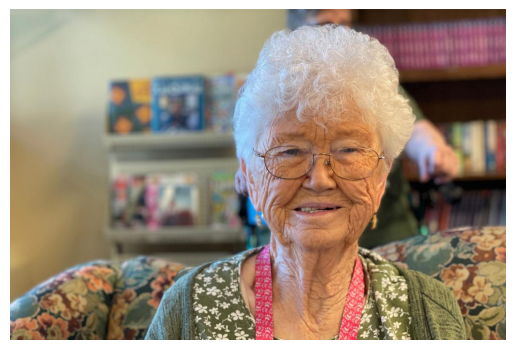

In [5]:
imagen = cv.imread("/home/sylph/DataCantatio/pablocaicedor.github.io/recursos/Codigo/Imagenes/elderly.jpg")
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
mostrarImagen(imagen)

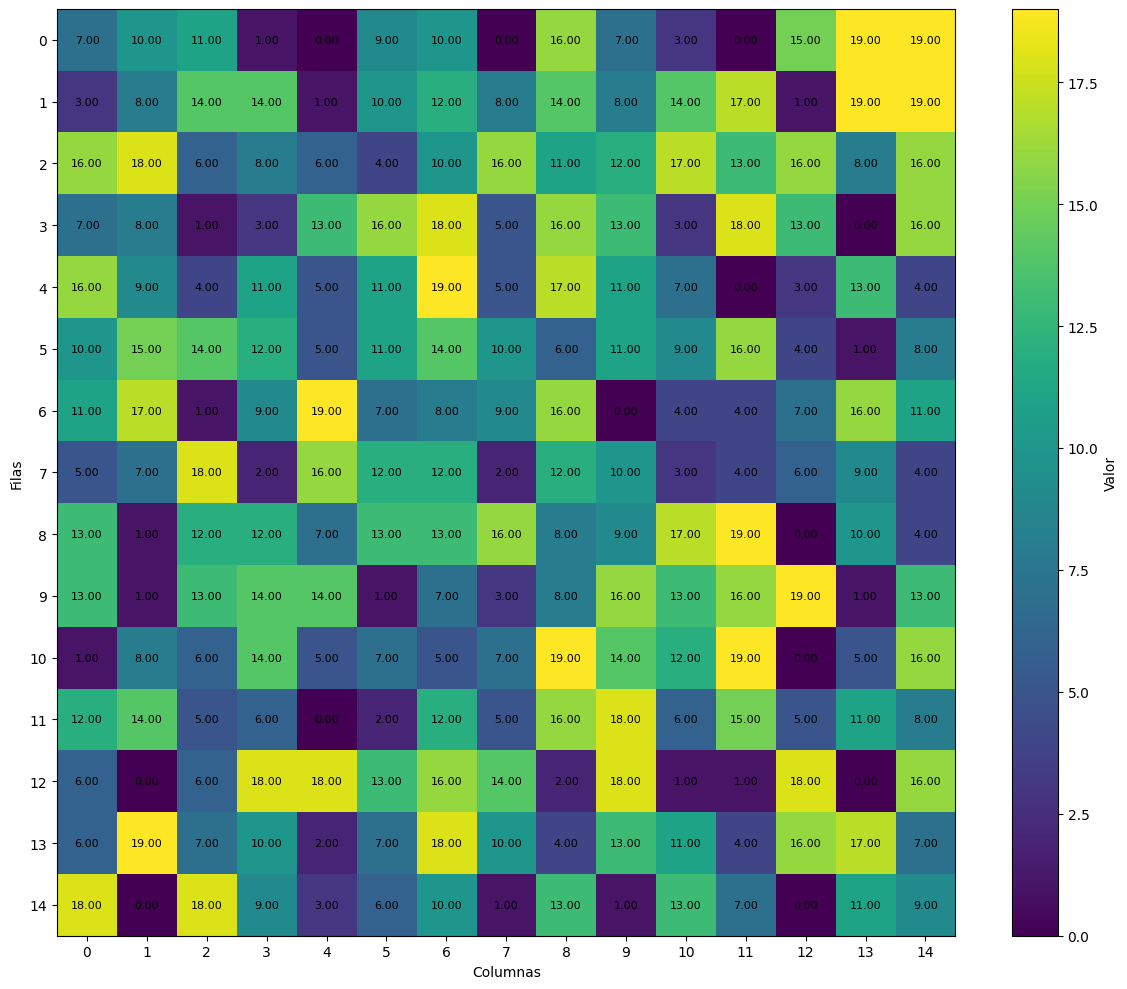

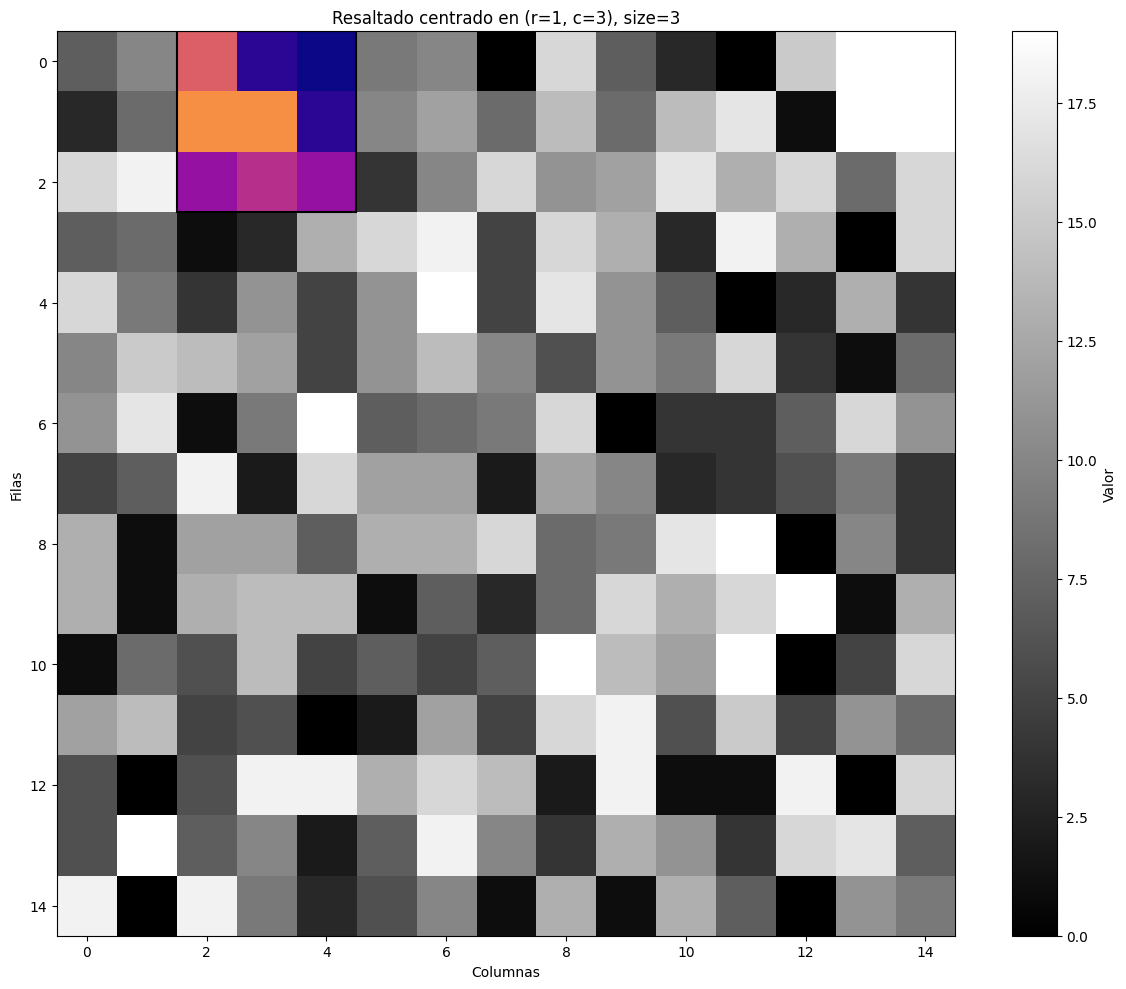

In [6]:
prueba1 = np.random.randint(0, 20, size=(15,15))
mostrarHeatMap(prueba1)
heatmap_resaltado_centro(prueba1, r=1, c=3, size=3, cmap_base="gray", cmap_resalte="plasma")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import imageio.v2 as imageio
import io

# ============================
# 1) Funciones base del usuario
# ============================

def _square_bounds_from_center(r, c, size, nrows, ncols):
    """
    Devuelve (r0, r1, c0, c1) para un cuadrado centrado en (r,c) de lado `size`.
    r1 y c1 son exclusivos (estilo slicing de Python).
    Lanza ValueError si se sale de límites.
    """
    if size <= 0:
        raise ValueError("size debe ser entero positivo.")
    if not (0 <= r < nrows and 0 <= c < ncols):
        raise ValueError("Centro fuera de rango.")
    # Para tamaños pares y nones:
    half_floor = size // 2
    r0 = r - half_floor
    c0 = c - half_floor
    r1 = r0 + size
    c1 = c0 + size
    if r0 < 0 or c0 < 0 or r1 > nrows or c1 > ncols:
        raise ValueError("El cuadrado centrado excede los límites de la matriz.")
    return r0, r1, c0, c1

def heatmap_resaltado_centro(mat, r, c, size, cmap_base="viridis", cmap_resalte="plasma"):
    """
    Heatmap que recolorea una subregión cuadrada centrada en (r,c) con otro colormap.
    (Versión interactiva para visualizar en pantalla)
    """
    mat = np.asarray(mat, dtype=float)
    nrows, ncols = mat.shape
    r0, r1, c0, c1 = _square_bounds_from_center(r, c, size, nrows, ncols)

    fig, ax = plt.subplots(figsize=(12, 10))
    im_base = ax.imshow(mat, cmap=cmap_base, aspect="auto", interpolation="nearest")
    cbar = plt.colorbar(im_base, ax=ax); cbar.set_label("Valor")

    # Máscara: True=oculto, False=visible
    mask = np.ones_like(mat, dtype=bool)
    mask[r0:r1, c0:c1] = False
    region = np.ma.masked_array(mat, mask=mask)
    ax.imshow(region, cmap=cmap_resalte, aspect="auto", interpolation="nearest",
              norm=im_base.norm)

    # Marco del cuadrado
    ax.add_patch(Rectangle((c0-0.5, r0-0.5), width=size, height=size,
                           fill=False, edgecolor="black", linewidth=1.5))

    ax.set_xlabel("Columnas"); ax.set_ylabel("Filas")
    ax.set_title(f"Resaltado centrado en (r={r}, c={c}), size={size}")
    plt.tight_layout(); plt.show()

def heatmap_rectangulo_centro(mat, r, c, size, alpha=0.25, cmap="viridis"):
    """
    Heatmap con un rectángulo semitransparente centrado en (r,c), sin recolorear datos.
    (Versión interactiva para visualizar en pantalla)
    """
    mat = np.asarray(mat, dtype=float)
    nrows, ncols = mat.shape
    r0, r1, c0, c1 = _square_bounds_from_center(r, c, size, nrows, ncols)

    fig, ax = plt.subplots(figsize=(6, 4))
    im = ax.imshow(mat, cmap=cmap, aspect="auto", interpolation="nearest")
    plt.colorbar(im, ax=ax).set_label("Valor")

    ax.add_patch(Rectangle((c0-0.5, r0-0.5), width=size, height=size,
                           linewidth=1.5, edgecolor="black",
                           facecolor="white", alpha=alpha))

    ax.set_xlabel("Columnas"); ax.set_ylabel("Filas")
    ax.set_title(f"Rectángulo centrado en (r={r}, c={c}), size={size}")
    plt.tight_layout(); plt.show()

# ===================================================
# 2) Versión "no interactiva" para generar un frame
#    (misma lógica que heatmap_resaltado_centro)
# ===================================================

def heatmap_resaltado_centro_frame(mat, r, c, size,
                                   cmap_base="gray", cmap_resalte="plasma",
                                   figsize=(8, 6), dpi=120):
    """
    Genera un frame (ndarray HxWx3) del heatmap con recoloreo de una subregión
    centrada en (r,c). No llama plt.show(); devuelve la imagen renderizada.
    """
    mat = np.asarray(mat, dtype=float)
    nrows, ncols = mat.shape
    r0, r1, c0, c1 = _square_bounds_from_center(r, c, size, nrows, ncols)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    im_base = ax.imshow(mat, cmap=cmap_base, aspect="auto", interpolation="nearest")
    cbar = plt.colorbar(im_base, ax=ax); cbar.set_label("Valor")

    mask = np.ones_like(mat, dtype=bool)
    mask[r0:r1, c0:c1] = False
    region = np.ma.masked_array(mat, mask=mask)
    ax.imshow(region, cmap=cmap_resalte, aspect="auto", interpolation="nearest",
              norm=im_base.norm)

    ax.add_patch(Rectangle((c0-0.5, r0-0.5), width=size, height=size,
                           fill=False, edgecolor="black", linewidth=1.5))

    ax.set_xlabel("Columnas"); ax.set_ylabel("Filas")
    ax.set_title(f"Resaltado centrado en (r={r}, c={c}), size={size}")
    plt.tight_layout()

    # Captura robusta del frame: guardamos a un buffer PNG y leemos con imageio
    buf = io.BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    frame = imageio.imread(buf)

    plt.close(fig)
    return frame

# ==========================================
# 3) Generador del GIF moviendo la "máscara"
# ==========================================

def generate_moving_mask_gif(mat, size=3, out_path="heatmap_moving_mask.gif",
                             order="raster", fps=10,
                             cmap_base="gray", cmap_resalte="plasma",
                             figsize=(8, 6), dpi=120):
    """
    Genera un GIF moviendo la subregión recoloreada por toda la matriz.
    - order: "raster" (izq->der en cada fila) o "snake" (alternando sentido por fila).
    """
    mat = np.asarray(mat, dtype=float)
    nrows, ncols = mat.shape
    frames = []

    # Centros válidos donde cabe el cuadrado
    # Usamos la misma validación de _square_bounds_from_center
    candidates = []
    for r in range(nrows):
        for c in range(ncols):
            try:
                _square_bounds_from_center(r, c, size, nrows, ncols)
                candidates.append((r, c))
            except ValueError:
                pass

    # Orden de recorrido
    if order not in ("raster", "snake"):
        raise ValueError("order debe ser 'raster' o 'snake'.")

    # Reorganizamos por filas para "snake"
    if order == "snake":
        # agrupar por r y alternar dirección por fila
        from collections import defaultdict
        rows = defaultdict(list)
        for r, c in candidates:
            rows[r].append(c)
        for r in range(nrows):
            cols = sorted(rows[r])
            if r % 2 == 1:
                cols = list(reversed(cols))
            for c in cols:
                # asegurar que (r,c) está en candidates (por límites)
                try:
                    _square_bounds_from_center(r, c, size, nrows, ncols)
                    frame = heatmap_resaltado_centro_frame(
                        mat, r, c, size,
                        cmap_base=cmap_base, cmap_resalte=cmap_resalte,
                        figsize=figsize, dpi=dpi
                    )
                    frames.append(frame)
                except ValueError:
                    continue
    else:
        # "raster": ordenar por r, luego c ascendente
        for r, c in sorted(candidates):
            frame = heatmap_resaltado_centro_frame(
                mat, r, c, size,
                cmap_base=cmap_base, cmap_resalte=cmap_resalte,
                figsize=figsize, dpi=dpi
            )
            frames.append(frame)

    # Guardar GIF
    if len(frames) == 0:
        raise RuntimeError("No se generaron frames; revise 'size' y dimensiones de la matriz.")
    imageio.mimsave(out_path, frames, fps=fps, loop=0)
    print(f"GIF guardado en: {out_path} | Frames: {len(frames)} | "
          f"mat={mat.shape}, size={size}, orden={order}, fps={fps}")

# ============================
# 4) Ejemplo de uso solicitado
# ============================
if __name__ == "__main__":
    np.random.seed(42)
    prueba1 = np.random.randint(0, 20, size=(15, 15))

    # Visualización fija de referencia (opcional):
    # heatmap_resaltado_centro(prueba1, r=1, c=3, size=3, cmap_base="gray", cmap_resalte="plasma")

    # Generar el GIF moviendo la máscara de recoloreo
    generate_moving_mask_gif(
        prueba1,
        size=3,
        out_path="heatmap_moving_mask.gif",
        order="raster",          # "raster" o "snake"
        fps=10,
        cmap_base="gray",
        cmap_resalte="plasma",
        figsize=(8, 6),
        dpi=120
    )


GIF guardado en: heatmap_moving_mask.gif | Frames: 169 | mat=(15, 15), size=3, orden=raster, fps=10
